# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [121]:
# Import essential libraries for data manipulation and analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [123]:
# Importing the file porter_data_1.csv
porter = pd.read_csv("porter_data_1.csv")
porter.head()

market_id       created_at actual_delivery_time  store_primary_category  \
0          1   2/6/2015 22:24       2/6/2015 23:11                       4   
1          2  2/10/2015 21:49      2/10/2015 22:33                      46   
2          2   2/16/2015 0:11       2/16/2015 1:06                      36   
3          1   2/12/2015 3:36       2/12/2015 4:35                      38   
4          1   1/27/2015 2:12       1/27/2015 2:58                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0               1            4      3441                   4             557   
1               2            1      1900                   1            1400   
2               3            4      4771                   3             820   
3               1            1      1525                   1            1525   
4               1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                     33                  14   
1            1400                      1                   2   
2            1604                      8                   6   
3            1525                      5                   6   
4            2195                      5                   5   

   total_outstanding_orders  distance  
0                        21     34.44  
1                         2     27.60  
2                        18     11.56  
3                         8     31.80  
4                         7      8.20

In [124]:
porter.shape

(175777, 14)

In [125]:
porter.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

In [126]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  int64  
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  int64  
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  int64  
 11  total_busy_dashers        175777 non-null  int64  
 12  total_outstanding_orders  175777 non-null  int64  
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [130]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

porter['created_at'] = pd.to_datetime(porter['created_at'])
porter['actual_delivery_time'] = pd.to_datetime(porter['actual_delivery_time'])

In [131]:
porter.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0          1 2015-02-06 22:24:00  2015-02-06 23:11:00                       4   
1          2 2015-02-10 21:49:00  2015-02-10 22:33:00                      46   
2          2 2015-02-16 00:11:00  2015-02-16 01:06:00                      36   
3          1 2015-02-12 03:36:00  2015-02-12 04:35:00                      38   
4          1 2015-01-27 02:12:00  2015-01-27 02:58:00                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0               1            4      3441                   4             557   
1               2            1      1900                   1            1400   
2               3            4      4771                   3             820   
3               1            1      1525                   1            1525   
4               1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                     33                  14   
1            1400                      1                   2   
2            1604                      8                   6   
3            1525                      5                   6   
4            2195                      5                   5   

   total_outstanding_orders  distance  
0                        21     34.44  
1                         2     27.60  
2                        18     11.56  
3                         8     31.80  
4                         7      8.20

In [132]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  int64         
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  int64         
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  int64         
 11  total_busy_dashers        175777 non-null  int64         
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [134]:
# Convert categorical features to category type

porter['store_primary_category'] = porter['store_primary_category'].astype('category')
porter['order_protocol'] = porter['order_protocol'].astype('category')

In [135]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  int64         
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  int64         
 11  total_busy_dashers        175777 non-null  int64         
 12  to

In [136]:
porter.head()

market_id          created_at actual_delivery_time store_primary_category  \
0          1 2015-02-06 22:24:00  2015-02-06 23:11:00                      4   
1          2 2015-02-10 21:49:00  2015-02-10 22:33:00                     46   
2          2 2015-02-16 00:11:00  2015-02-16 01:06:00                     36   
3          1 2015-02-12 03:36:00  2015-02-12 04:35:00                     38   
4          1 2015-01-27 02:12:00  2015-01-27 02:58:00                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0              1            4      3441                   4             557   
1              2            1      1900                   1            1400   
2              3            4      4771                   3             820   
3              1            1      1525                   1            1525   
4              1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                     33                  14   
1            1400                      1                   2   
2            1604                      8                   6   
3            1525                      5                   6   
4            2195                      5                   5   

   total_outstanding_orders  distance  
0                        21     34.44  
1                         2     27.60  
2                        18     11.56  
3                         8     31.80  
4                         7      8.20

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [160]:
# Calculate time taken in minutes
porter['delivery_time_minutes'] = (porter['actual_delivery_time'] - porter['created_at']).dt.total_seconds() / 60

In [162]:
porter['delivery_time_minutes']

0         47.0
1         44.0
2         55.0
3         59.0
4         46.0
          ... 
175772    43.0
175773    62.0
175774    46.0
175775    45.0
175776    37.0
Name: delivery_time_minutes, Length: 175777, dtype: float64

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [176]:
# Extract the hour and day of week from the 'created_at' timestamp
porter_hour = porter['created_at'].dt.hour
porter_dayofweek = porter['created_at'].dt.dayofweek
# Create a categorical feature 'isWeekend'
porter_isweekend = porter_dayofweek.apply(lambda x: 1 if x >= 5 else 0)
porter_isweekend2 = porter_isweekend.astype('category')

In [166]:
porter_hour

0         22
1         21
2          0
3          3
4          2
          ..
175772     0
175773     0
175774     4
175775    18
175776    19
Name: created_at, Length: 175777, dtype: int32

In [168]:
porter_dayofweek

0         4
1         1
2         0
3         3
4         1
         ..
175772    1
175773    4
175774    5
175775    6
175776    6
Name: created_at, Length: 175777, dtype: int32

In [170]:
porter_isweekend

0         0
1         0
2         0
3         0
4         0
         ..
175772    0
175773    0
175774    1
175775    1
175776    1
Name: created_at, Length: 175777, dtype: int64

In [188]:
# Drop unnecessary columns
columns_unecessary = ['created_at', 'actual_delivery_time']
porter = porter.drop(columns=columns_unecessary)

In [190]:
porter.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0          1                      4              1            4      3441   
1          2                     46              2            1      1900   
2          2                     36              3            4      4771   
3          1                     38              1            1      1525   
4          1                     38              1            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                     33   
1                   1            1400            1400                      1   
2                   3             820            1604                      8   
3                   1            1525            1525                      5   
4                   2            1425            2195                      5   

   total_busy_dashers  total_outstanding_orders  distance  \
0                  14                        21     34.44   
1                   2                         2     27.60   
2                   6                        18     11.56   
3                   6                         8     31.80   
4                   5                         7      8.20   

   delivery_time_minutes  
0                   47.0  
1                   44.0  
2                   55.0  
3                   59.0  
4                   46.0

In [194]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  int64   
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  int64   
 9   total_busy_dashers        175777 non-null  int64   
 10  total_outstanding_orders  175777 non-null  int64   
 11  distance                  175777 non-null  float64 
 12  delivery_time_minutes     175777 non-null  float64 
dtypes: category(2), float64(2), i

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [196]:
# Define target variable (y) and features (X)
from sklearn.model_selection import train_test_split
X = porter.drop('delivery_time_minutes', axis=1)
y = porter['delivery_time_minutes'] 

In [204]:
print("X:")
print(X.head())
print("y:")
print(y.head())

X:
   market_id store_primary_category order_protocol  total_items  subtotal  \
0          1                      4              1            4      3441   
1          2                     46              2            1      1900   
2          2                     36              3            4      4771   
3          1                     38              1            1      1525   
4          1                     38              1            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                     33   
1                   1            1400            1400                      1   
2                   3             820            1604                      8   
3                   1            1525            1525                      5   
4                   2            1425            2195                      5   

   total_busy_dashers  total_outstanding_orders  dist

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [207]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [216]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical = X_train.select_dtypes(include=np.number).columns.tolist()
categorical = X_train.select_dtypes(include=['category']).columns.tolist()

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

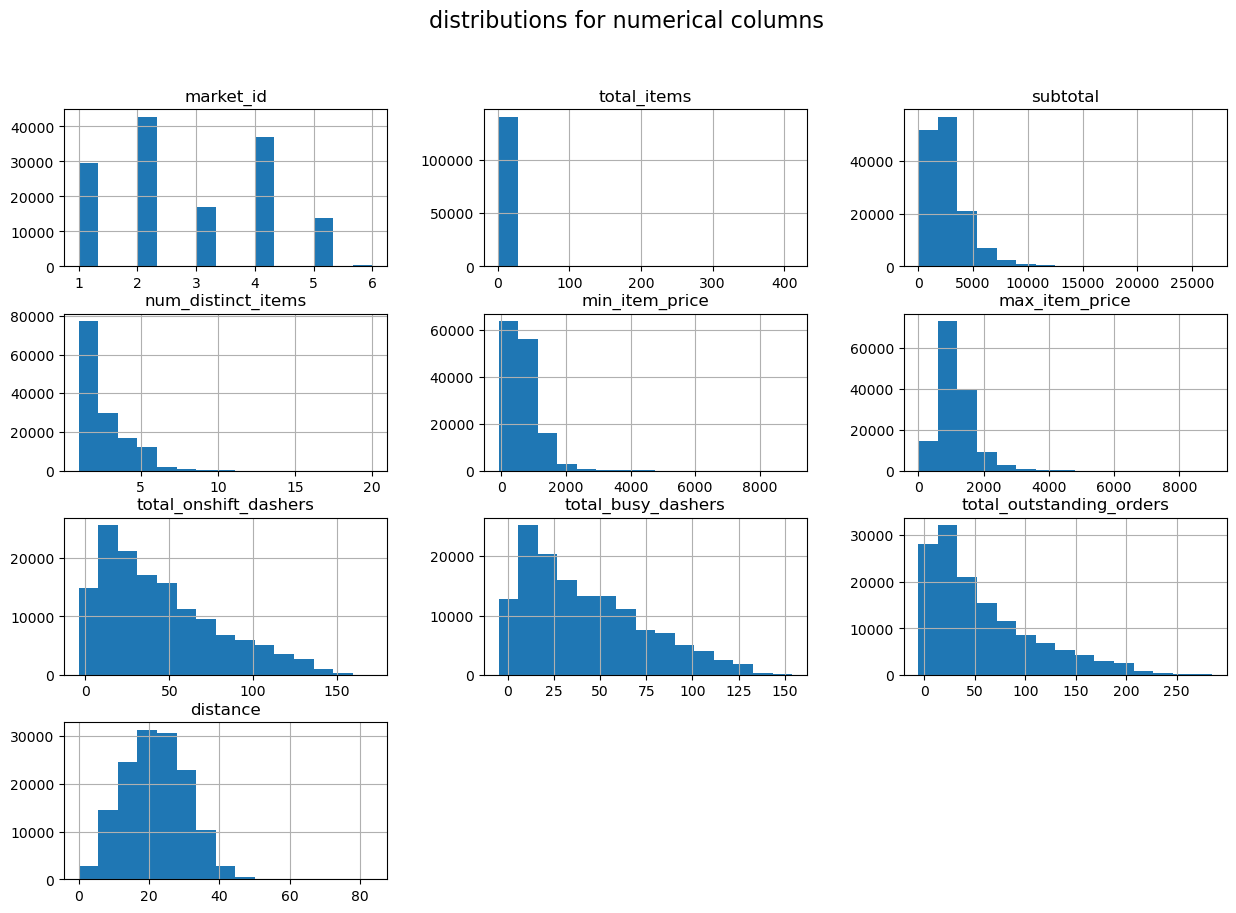

In [222]:
# Plot distributions for all numerical columns

X_train[numerical].hist(bins=15, figsize=(15, 10))
plt.suptitle('distributions for numerical columns', fontsize=16)
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

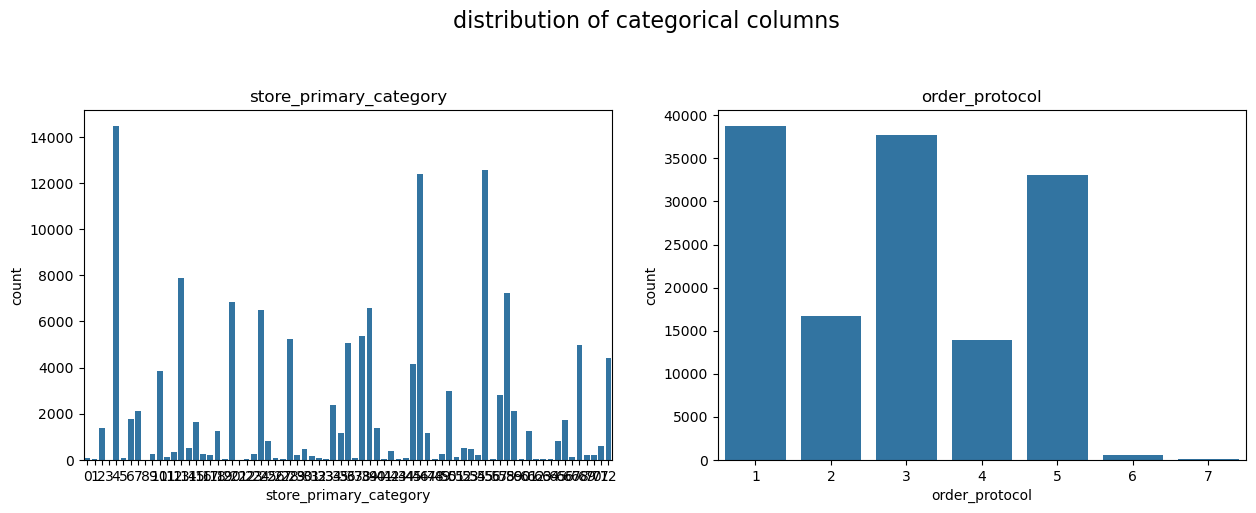

In [226]:
# Distribution of categorical columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=X_train[col])
    plt.title(col)
plt.suptitle('distribution of categorical columns', fontsize=16)
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

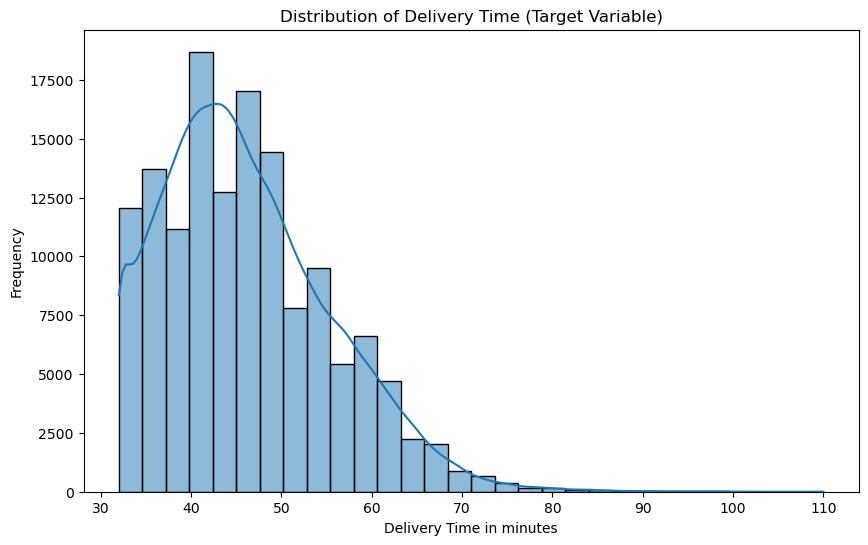

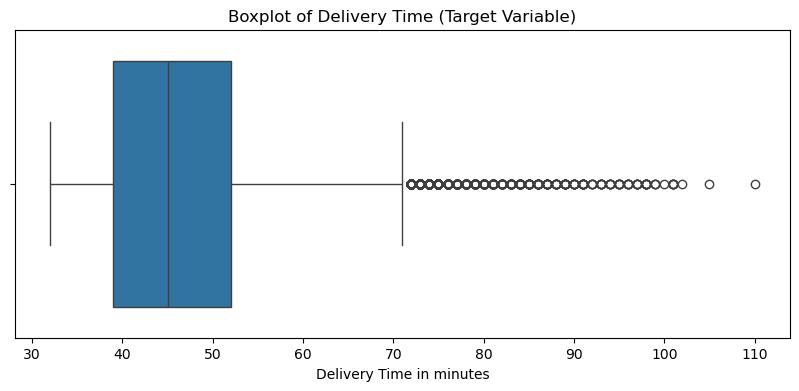

In [234]:
# Distribution of time_taken

plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=30, kde=True)
plt.title('Distribution of Delivery Time (Target Variable)')
plt.xlabel('Delivery Time in minutes')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=y_train)
plt.title('Boxplot of Delivery Time (Target Variable)')
plt.xlabel('Delivery Time in minutes')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

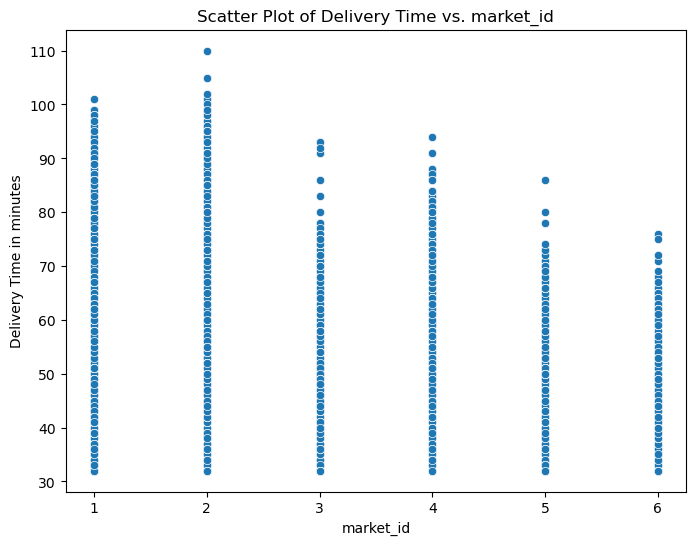

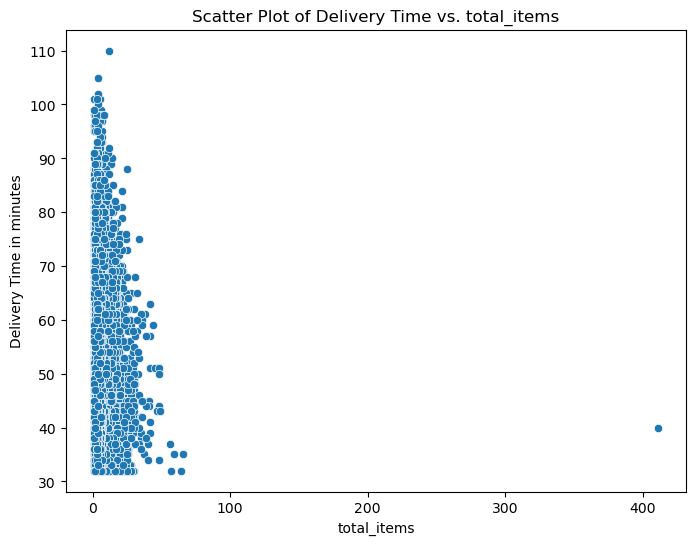

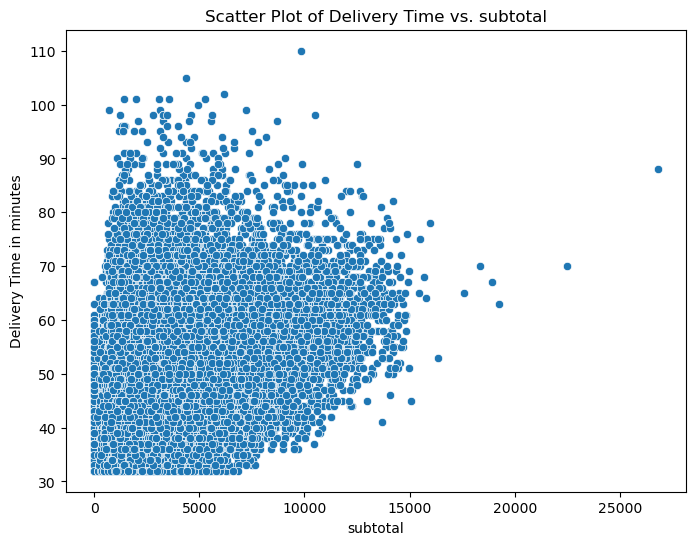

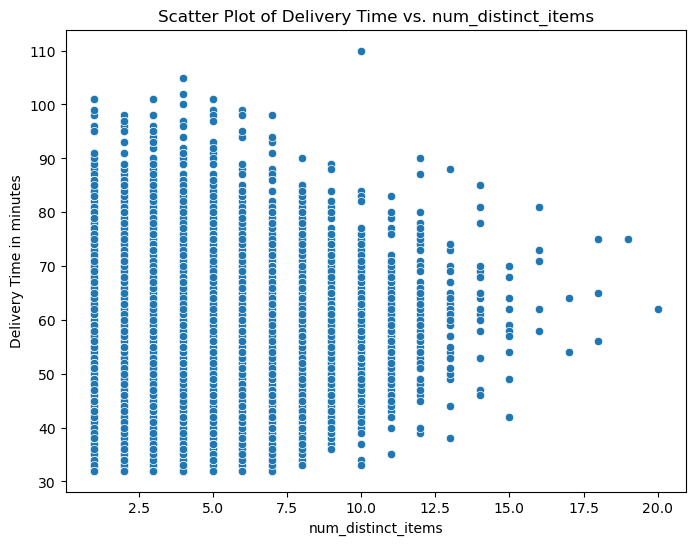

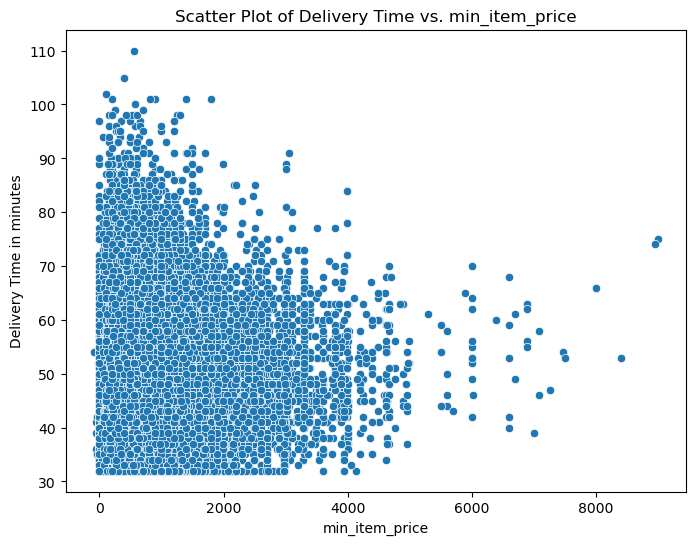

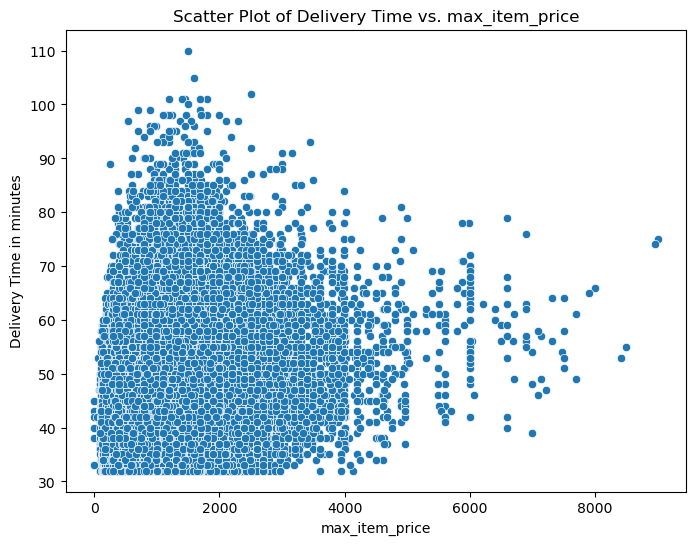

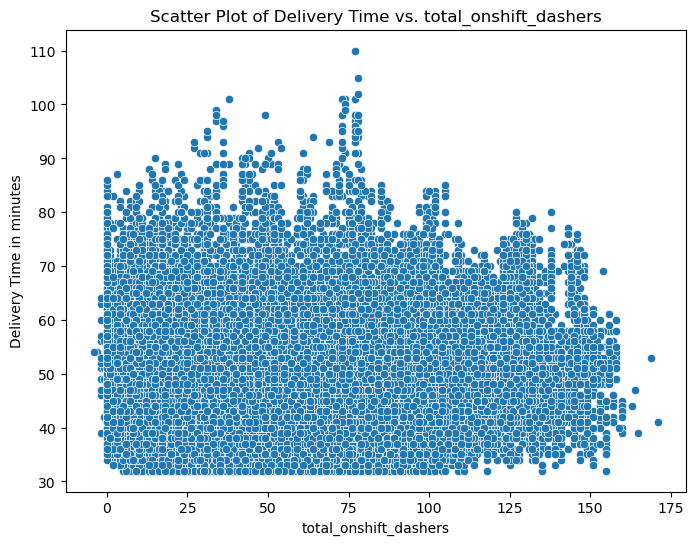

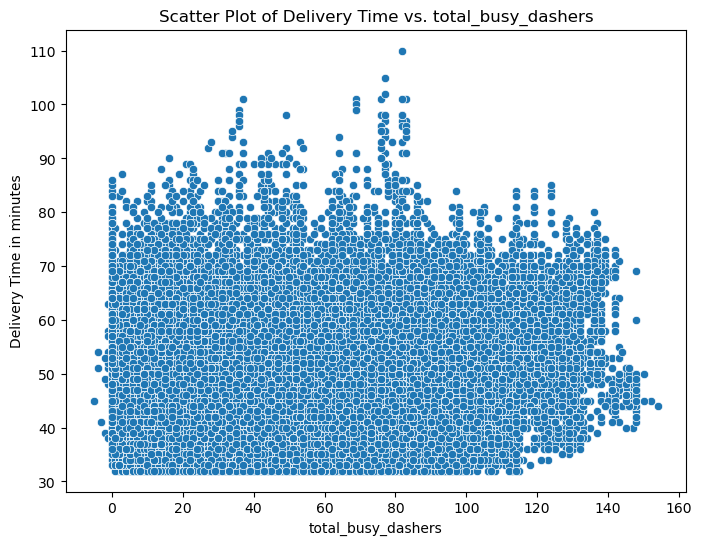

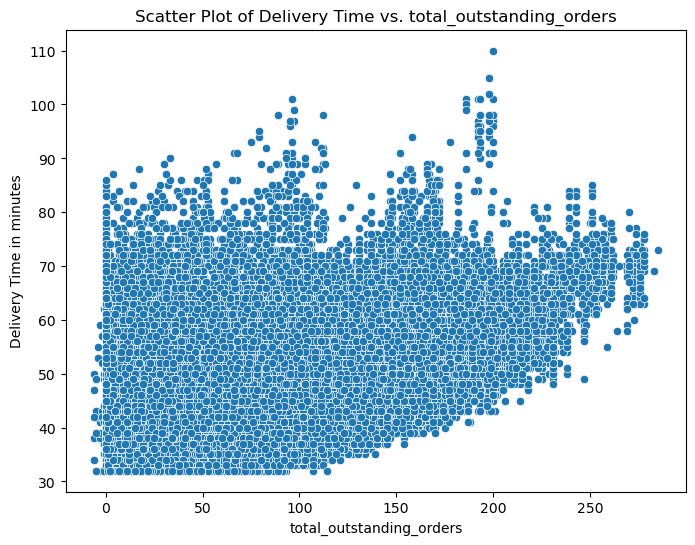

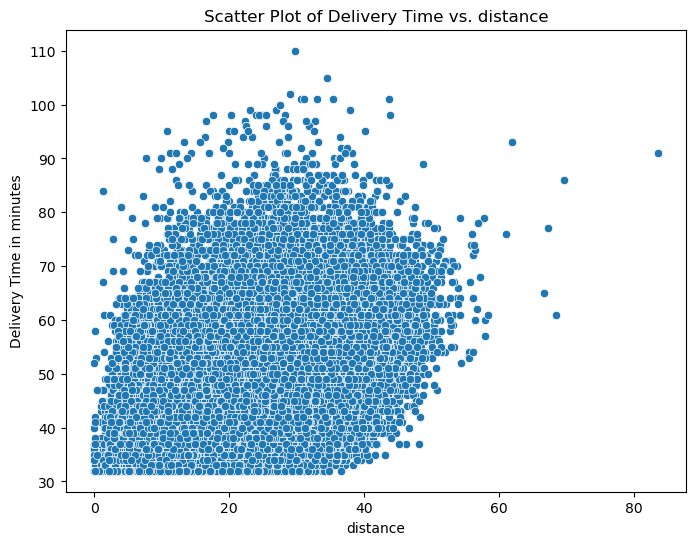

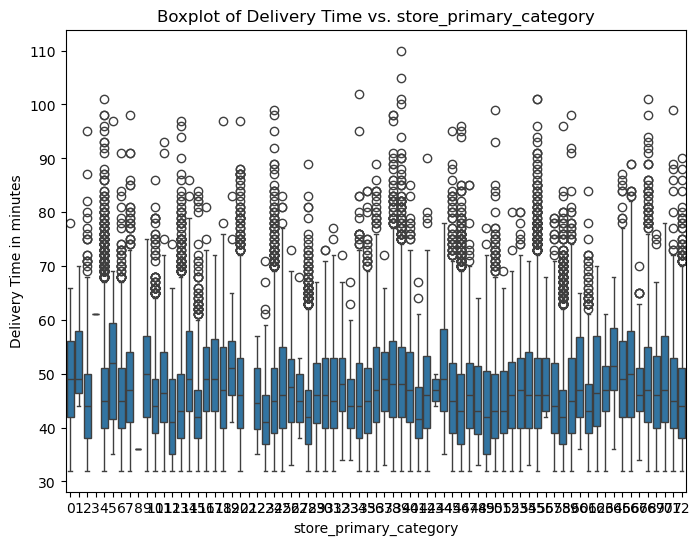

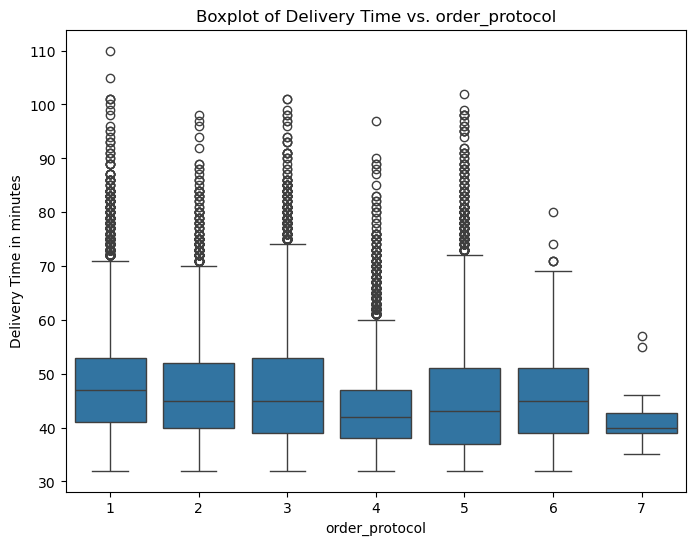

In [240]:
# Scatter plot to visualise the relationship between time_taken and other features

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_train[col], y=y_train)
    plt.title(f'Scatter Plot of Delivery Time vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Time in minutes')
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=X_train[col], y=y_train) 
    plt.title(f'Boxplot of Delivery Time vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Time in minutes')
    plt.show()

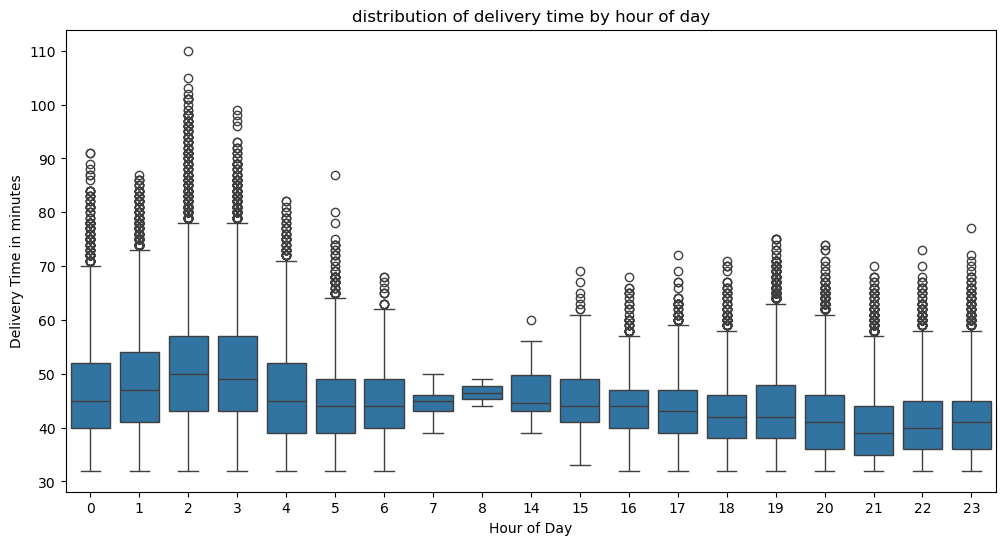

In [246]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(x=porter_hour, y=porter['delivery_time_minutes'])
plt.title('distribution of delivery time by hour of day')
plt.xlabel('Hour of Day')
plt.ylabel('Delivery Time in minutes')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

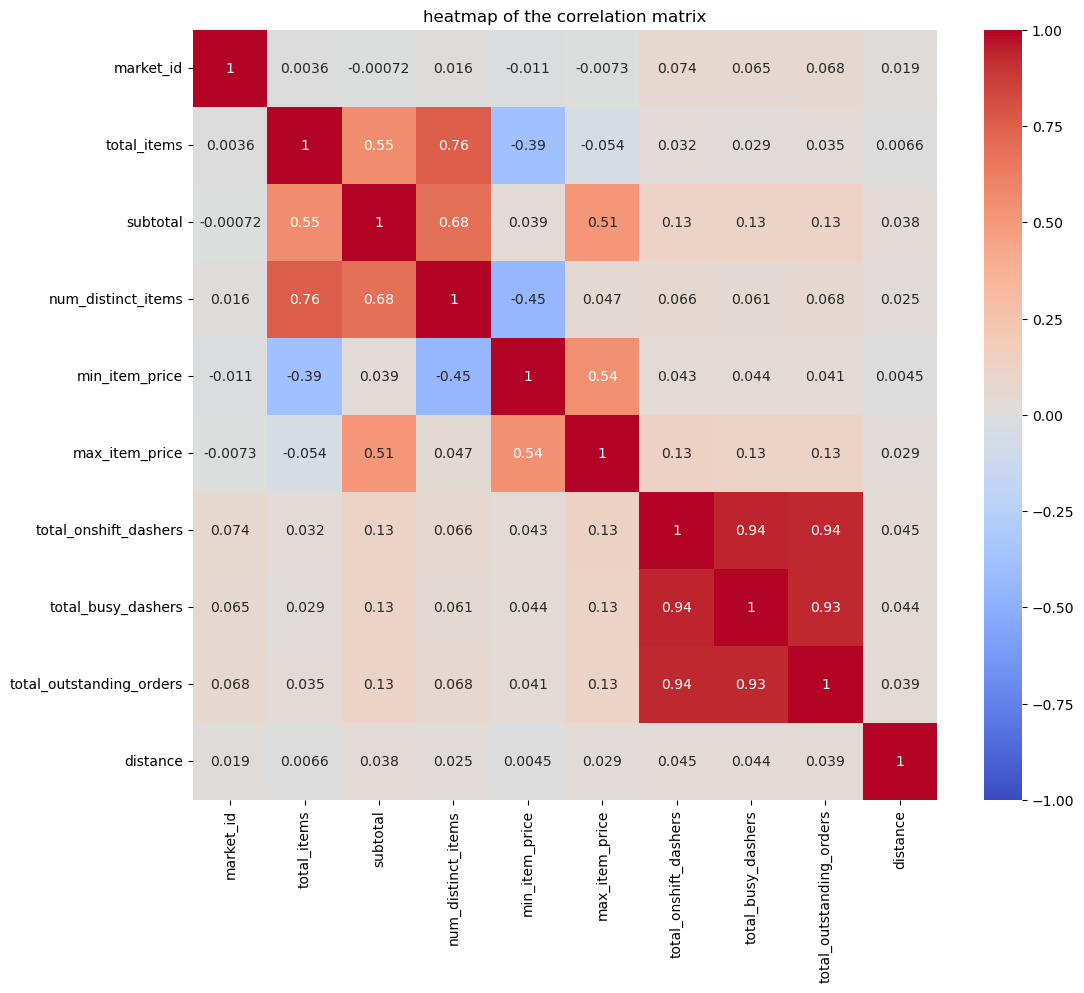

In [250]:
# Plot the heatmap of the correlation matrix
correlation_matrix = porter[numerical].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('heatmap of the correlation matrix')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [262]:
# Drop 3-5 weakly correlated columns from training dataset

weakly_correlated = correlation_matrix[abs(correlation_matrix) < 0.1].index.tolist()
columns_dropped = [col for col in weakly_correlated if col != 'delivery_time_minutes']
X_train_dropped = X_train.drop(columns=columns_dropped)
X_test_dropped = X_test.drop(columns=columns_dropped)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

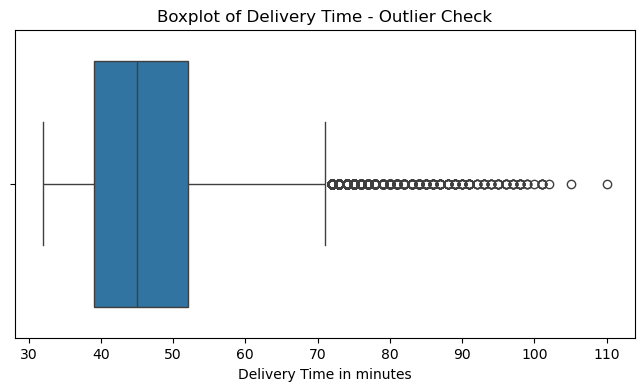

<Figure size 1500x1000 with 0 Axes>

In [264]:
# Boxplot for time_taken

plt.figure(figsize=(8, 4))
sns.boxplot(x=y_train)
plt.title('Boxplot of Delivery Time - Outlier Check')
plt.xlabel('Delivery Time in minutes')
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(X_train_dropped.columns):
    if col in numerical_cols: 
        plt.subplot(3, 3, i + 1) 
        sns.boxplot(y=X_train_dropped[col])
        plt.title(col)
plt.suptitle('Boxplots of Numerical - Outlier', fontsize=16)
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [276]:
# Handle outliers
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_filtered

X_train_filtered = X_train_dropped.copy()
for col in X_train_dropped.columns:
    if col in numerical:
        X_train_filtered = remove_outliers_iqr(X_train_filtered, col)

In [278]:
print("Shape of X_train after outlier removal:", X_train_filtered.shape)
print("Shape of y_train after outlier removal:", y_train_filtered.shape)

Shape of X_train after outlier removal: (140621, 2)


NameError: name 'y_train_filtered' is not defined

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [268]:
# Import libraries

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
# Apply scaling to the numerical columns



Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
# Create/Initialise the model


In [ ]:
# Train the model using the training data


In [ ]:
# Make predictions


In [ ]:
# Find results for evaluation metrics



Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [ ]:
# Loop through the number of features and test the model



In [ ]:
# Build the final model with selected number of features



## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram



[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>